<a href="https://colab.research.google.com/github/Laxmi-tech06/js-way_to_fullstack/blob/main/Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Business Requirements

2.Problem Identification

3.Data Cleaning

4.Data Prepration

5.Baseline Models

6.Model Training And Evaluation

7.Reguralization and Ensembling

8.Interpretation and Presentation



In [ ]:
%pip install opendatasets --upgrade --quiet
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']==14
matplotlib.rcParams['figure.facecolor']='#00000000'
matplotlib.rcParams['figure.figsize']=(10,6)

In [ ]:
# objectives and nature of data(why,problem statement like what is problem(increase sales,customers,look on page,forecasting))
# why and impact(customer and revenue)
# automation
# better than ml?
# scale of data(sensors,internet,manual errors)
# features of data will help u?
# missing data,data entry errors,diff in units
# curious about data and business req
# Accesss to right data
# FEASIBILITY OF PROJECT?

Rossman Sales:
The business problem is to predict the sales.

Why are we interested over that?
every manager is predicting in different way to standardise it would plain field it.Cost allocations can be accurate,not much inventory or little inventory.

how this problem solved currently?Managers

how can we solve this?Maybe look for some formula(statistical anaysis)...ml model is to create a formula that is little more complicated

Problem:Supervised:Regression(sales:continous value) and Classification(yes or no:category)
and Unsupervised

AI:Rule based sys or ml based models

supervised:you know what you want to predict-Sales,Tumour Prediction
unsupervised:no targets,learning data str eg customers clustering(which are frequent):grouping,Customer segmentation

Dimension Reduction(generalization):where you have many columns and you reduce 100s cols down to 10-15 columns...

Association(people like you watch movies and your and their watched movie:Recmmendations:similarity search)





Evaluation metrics needs to be chosen:They are used by humans to evaluate ml model.
Loss Functions:They are used by computers to optimize the ml model.

Regression:rmse,r squared(Evaluation metrics),NOT many outliers(mean absolute error):
Mean Absolute Error (MAE) is a common evaluation metric used to measure the accuracy of a model, particularly in regression tasks. It represents the average of the absolute differences between predicted values and actual values.Find the absolute difference: For each data point, subtract the predicted value from the actual value and take the absolute value.
Average the differences: Sum up all the absolute differences and then divide by the total number of data points.

Steps to Calculate Variance:
Find the mean of the dataset.
Subtract the mean from each data point to find the deviation from the mean.
Square the deviations (to ensure that negative deviations don't cancel out positive ones).
Find the average of the squared deviations. For a sample, divide by 𝑛−1, and for the population, divide by 𝑁.

R^2=1-RSS/TSS

R ^2 =1: Perfect fit, meaning the model explains all the variance in the data.

𝑅^2=0: The model explains none of the variance in the data, meaning the predictions are no better than simply predicting the mean value.

RMSE stands for Root Mean Squared Error. It is a widely used metric to evaluate the performance of regression models. RMSE measures the average magnitude of the errors between predicted values and actual values, and it gives an idea of how far off predictions are from the actual outcomes. The lower the RMSE value, the better the model's performance.

Find the errors: Subtract the predicted values from the actual values to calculate the errors for each data point.
Square the errors: This ensures that negative errors don't cancel out positive errors, and gives more weight to larger errors.
Find the mean of the squared errors: This is known as the Mean Squared Error (MSE).
Take the square root: The square root of the MSE gives the RMSE.


In [ ]:
# RMSPE :tells how much off by what percent?
# breast cancer :99 or 98 percent accuracy
# sales-80 is okay!
# Download datasets:csv files,sql datbases,raw file urls,kaggle datasets,google drive,dropbox etc.

In [ ]:
# %pip install opendatasets --upgrade --quiet
# import opendatasets as od
# od.download('https://www.kaggle.com/c/rossmann-store-sales')
# kaggle competitions download -c rossmann-store-sales
# os.listdir('rossmann-store-sales')
import zipfile

# Path to your zip file
zip_file_path='rossmann-store-sales.zip'
# zip_file_path='/content/rossmann-store-sales.zip'

# Open the zip file and list the contents
#
# zipfile.ZipFile is a class in Python's built-in zipfile module, which allows you to work with ZIP archives.
# It can be used to create, read, write, and extract files from ZIP files.
zip_file_path='rossmann-store-sales.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the zip
    zip_contents=zip_ref.namelist()
    print(zip_file_path)
    # .namelist():list of files from archive

print(zip_contents)

import zipfile
import os

# Path to your zip file
zip_file_path = 'rossmann-store-sales.zip'

# Directory where you want to extract files
extract_dir = 'rossmann-store-sales'

# Open the zip file and extract all files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the extraction directory
extracted_files = os.listdir(extract_dir)
print(extracted_files)



rossmann-store-sales.zip
['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']
['store.csv', 'test.csv', 'train.csv', 'sample_submission.csv']


In [ ]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv',low_memory=False)
# Setting low_memory=False forces pandas to read the entire file in memory in order to properly infer the data types. This can be useful in some cases where pandas is having trouble correctly inferring the types when reading the file in chunks.


In [ ]:
os.listdir('rossmann-store-sales')

['store.csv', 'test.csv', 'train.csv', 'sample_submission.csv']

In [ ]:
store_df=pd.read_csv('rossmann-store-sales/store.csv')

In [ ]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df=ross_df.merge(store_df,how='left',on='Store')

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


merged_df=ross_df.merge(store_df,how='left',on='Store')

This line of code is used to merge two pandas DataFrames (ross_df and store_df) based on a common column called 'Store'.

In [ ]:
merged_df.shape

(1017209, 18)

In [ ]:
test_df=pd.read_csv('rossmann-store-sales/test.csv')

In [ ]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
merged_test_df=test_df.merge(store_df,how='left',on='Store')

how='inner': This will only keep rows that have matching 'Store' values in both DataFrames.
how='right': This will keep all rows from store_df and bring in matching rows from ross_df. If there is no match in ross_df, the missing values are filled with NaN.
how='outer': This will keep all rows from both DataFrames, filling in missing values with NaN where there are no matches.

 The 'left' merge keeps all rows from the left DataFrame (ross_df) and brings in matching rows from the right DataFrame (store_df). If there is no match, it fills in the missing values with NaN.


In [ ]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
# If its normal distribution,average should be good
# if its exponential distribution,median is good!
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


if negative sales,returns higher than buy products....(or actual sales)
exclude that value...

Store is not open sales=0(special model holidays or include in that)

check if there are duplicate rows or not?

merged_df.describe():

This will compute summary statistics for numerical columns in the DataFrame merged_df, such as count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%).
It provides a statistical summary of all the numerical columns.

.T:
This transposes the result, swapping rows and columns. By default, describe() outputs a summary with statistics as rows and columns as features. Transposing it will make the features (columns) the rows and the statistics the columns.

round(..., 2):
This rounds the values in the DataFrame to 2 decimal places.

In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
merged_df['Date']=pd.to_datetime(merged_df['Date'])

In [ ]:
merged_test_df['Date']=pd.to_datetime(merged_test_df['Date'])

In [ ]:
merged_df.Date.min(),merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
merged_test_df.Date.min(),merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

# Exploratory Analysis:
1.Study the distribution of individual columns(linear,uniform,normal,exponential)

2.Detect anamolies (missing/incorrect)

3.Study relation with target column

4.Gather Insights

5.Come up with preprocessing and feature engineering
ex:wigth and height cant contribute much to height of cost,Rather make a column of area contributing much over here.

<Axes: xlabel='Sales', ylabel='Count'>

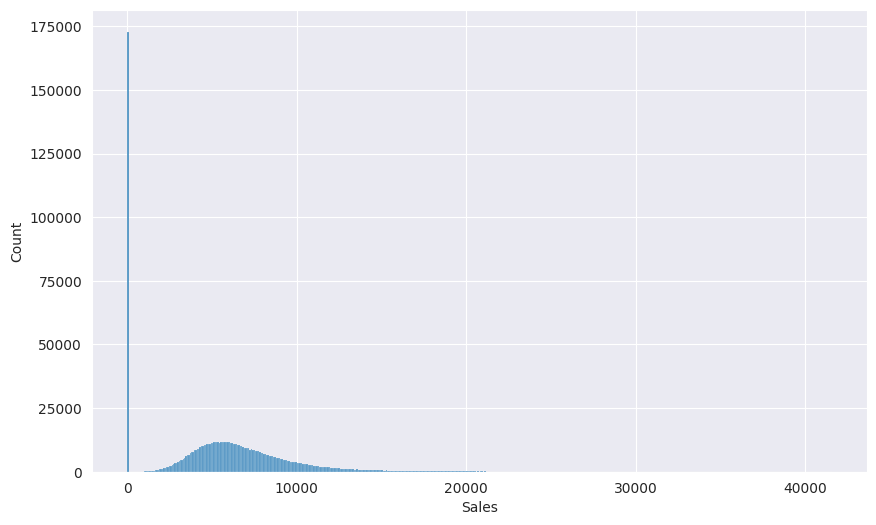

In [ ]:
# for year around prediction,its better to have one year test set for the same..
# Exploratory Analysis:
sns.histplot(data=merged_df,x='Sales')

In [ ]:
merged_df.Open

,Open
0,1
1,1
2,1
3,1
4,1
...,...
1017204,0
1017205,0
1017206,0
1017207,0


In [ ]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


In [ ]:
merged_df.Sales.value_counts()[0]

172871

In [ ]:
# Exclude all dates whenstore was closed:
merged_df=merged_df[merged_df.Open==1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

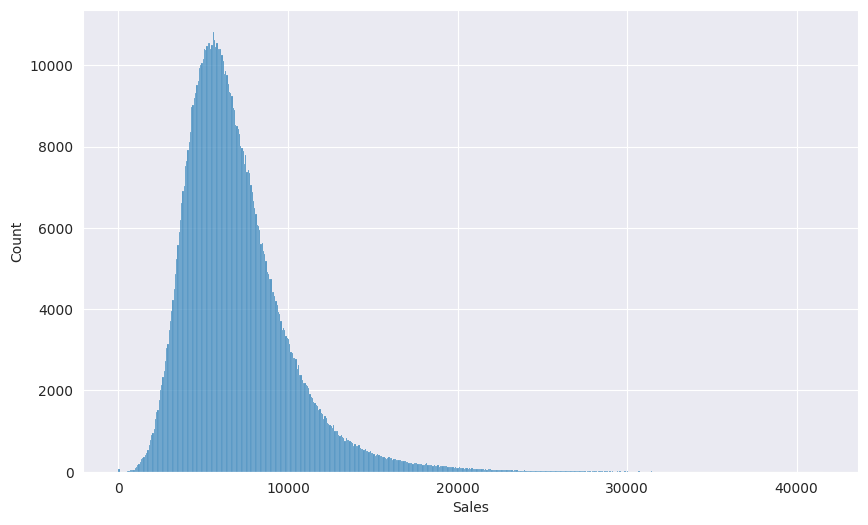

In [ ]:
sns.histplot(data=merged_df,x='Sales')

In [ ]:
merged_df1=merged_df[merged_df.Open==0].copy()
merged_df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


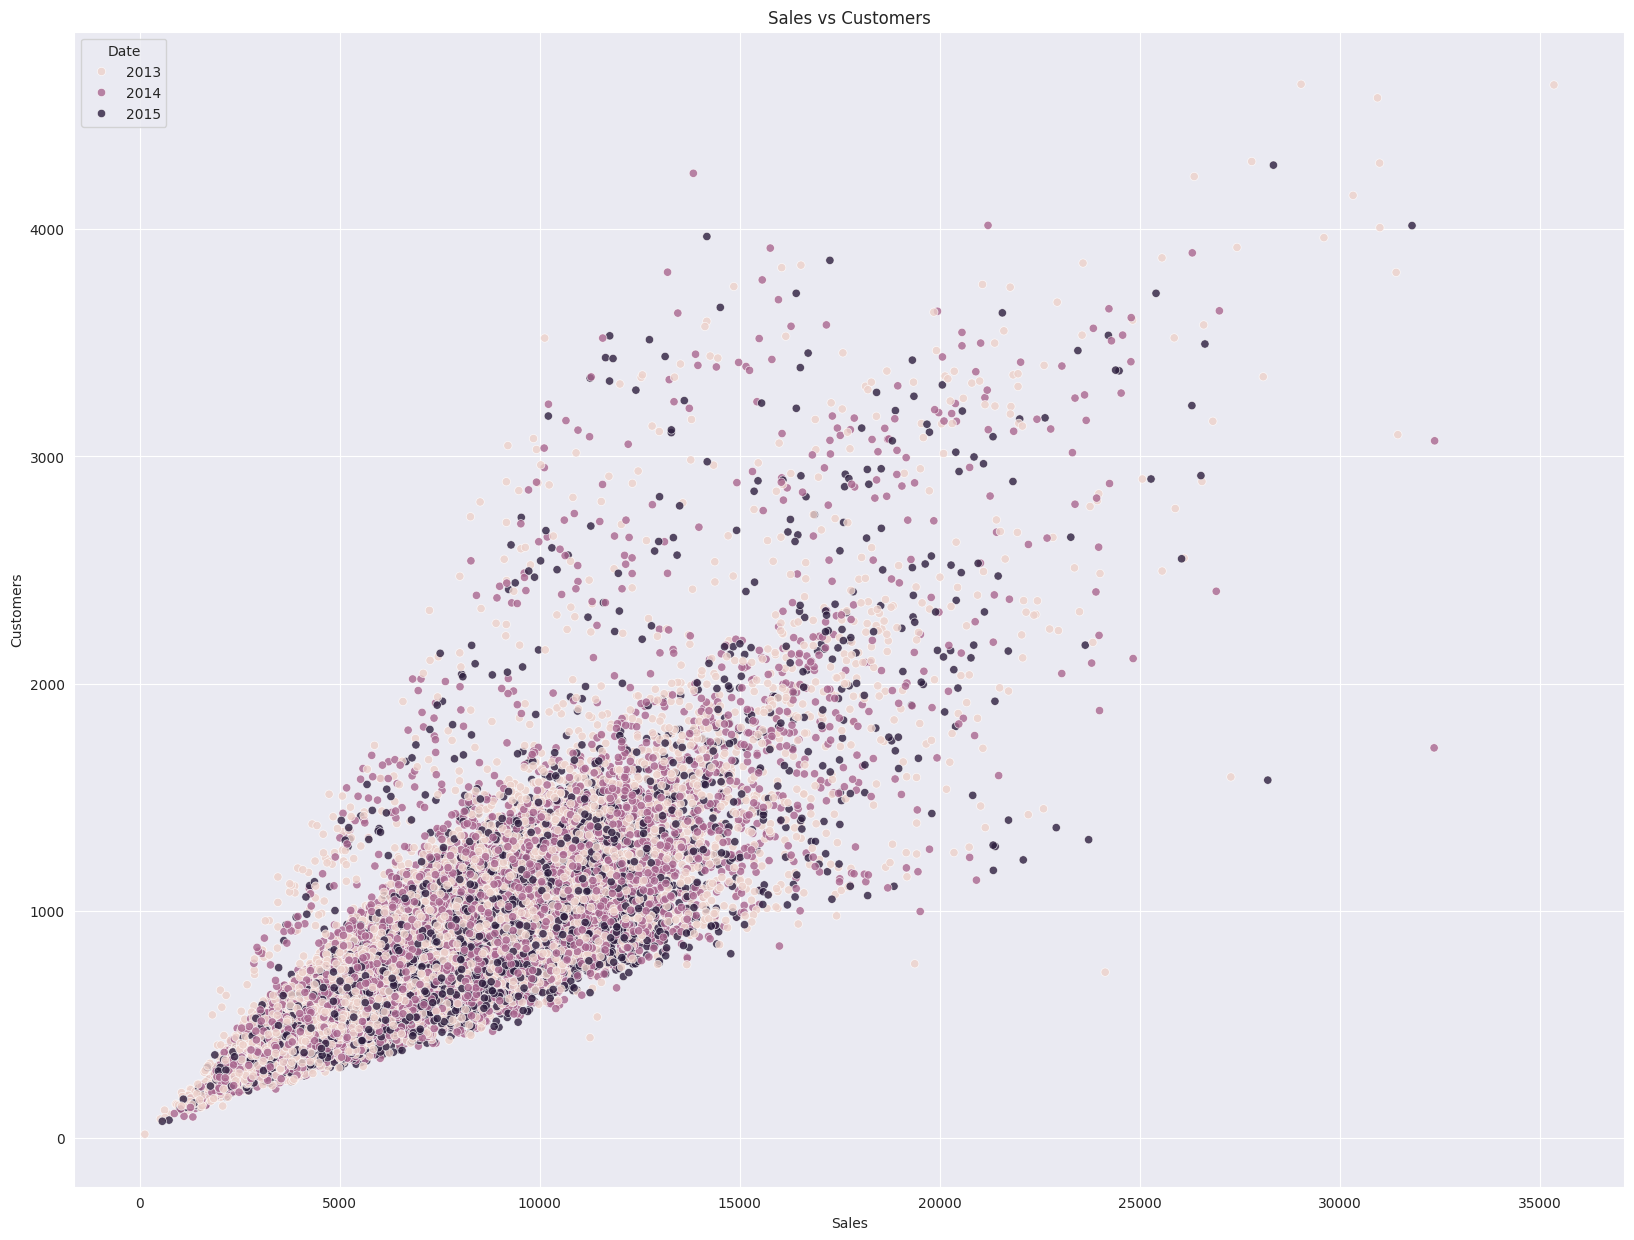

In [ ]:
plt.figure(figsize=(20,15))
temp_df=merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales,y=temp_df.Customers,hue=temp_df.Date.dt.year,alpha=0.8)
plt.title('Sales vs Customers')
plt.show()

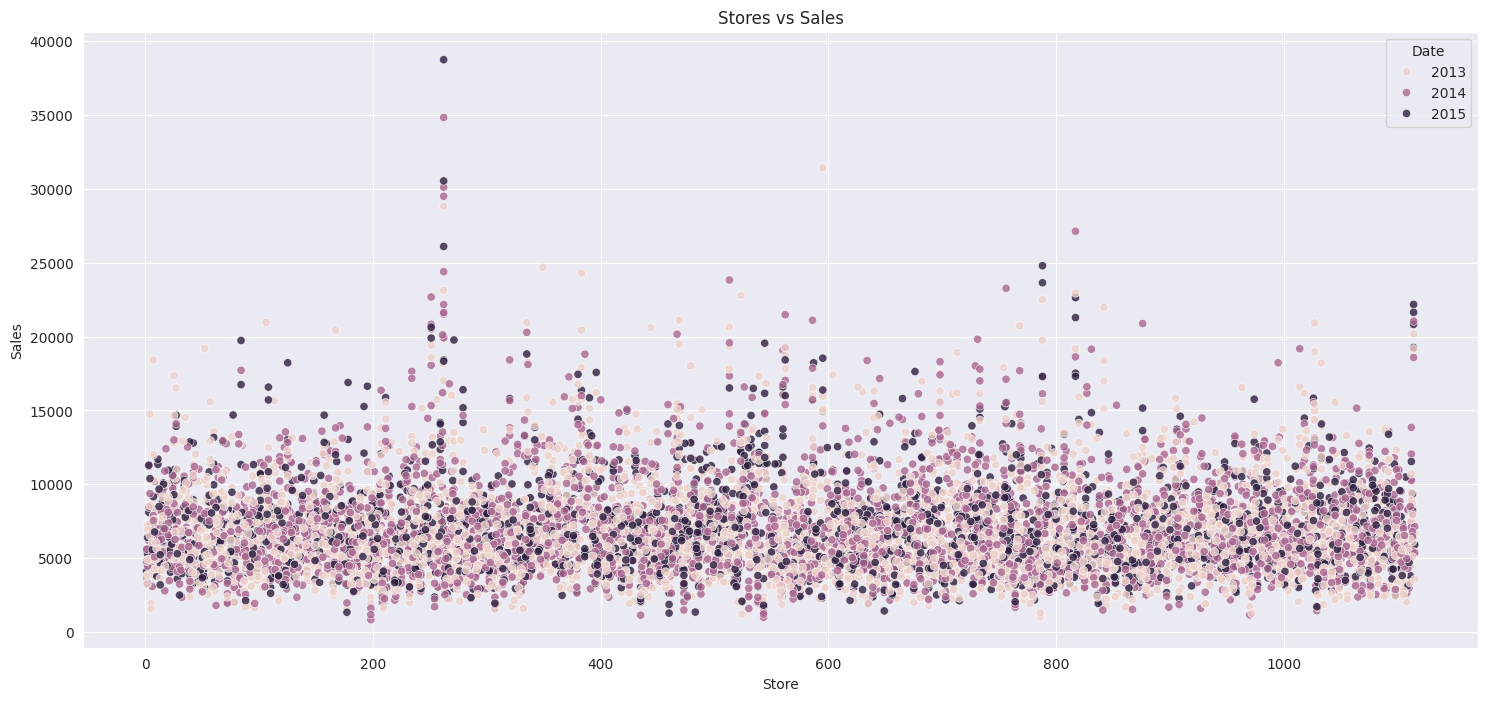

In [ ]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store,y=temp_df.Sales,hue=temp_df.Date.dt.year,alpha=0.8)
plt.title("Stores vs Sales")
plt.show()

In [ ]:
temp_df
# is this store number?
# if said that every vertical line represent a store...

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
454915,781,2,2014-05-20,6109,814,1,1,0,0,a,a,630.0,4.0,2007.0,0,NaN,NaN,NaN
394600,251,2,2014-07-15,20527,2488,1,1,0,1,a,c,340.0,NaN,NaN,0,NaN,NaN,NaN
455218,1084,2,2014-05-20,6866,890,1,1,0,0,a,a,190.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
492933,889,3,2014-04-16,5890,572,1,1,0,1,d,a,18670.0,12.0,2005.0,0,NaN,NaN,NaN
223443,444,1,2015-01-12,10550,1168,1,1,0,0,c,a,1700.0,11.0,2009.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991354,905,4,2013-01-24,10414,1442,1,1,0,0,a,a,90.0,6.0,2014.0,0,NaN,NaN,NaN
84938,199,6,2015-05-16,7721,658,1,0,0,0,d,c,6360.0,12.0,2010.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"
650072,813,2,2013-11-26,5961,687,1,0,0,0,a,a,1560.0,9.0,2003.0,0,NaN,NaN,NaN
757116,817,4,2013-08-22,19171,3257,1,0,0,0,a,a,140.0,3.0,2006.0,0,NaN,NaN,NaN


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

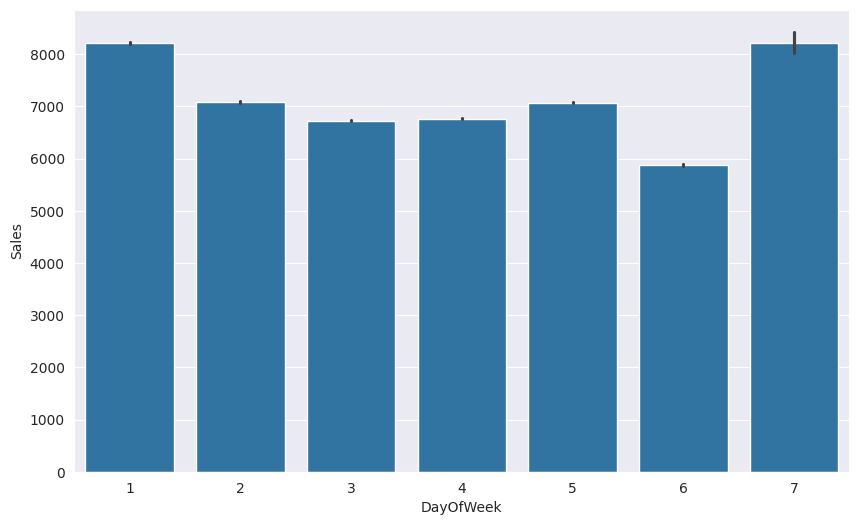

In [ ]:
sns.barplot(data=merged_df,x='DayOfWeek',y='Sales')

spending is max on mon and sunday and lowest on saturdays.

<Axes: xlabel='Promo', ylabel='Sales'>

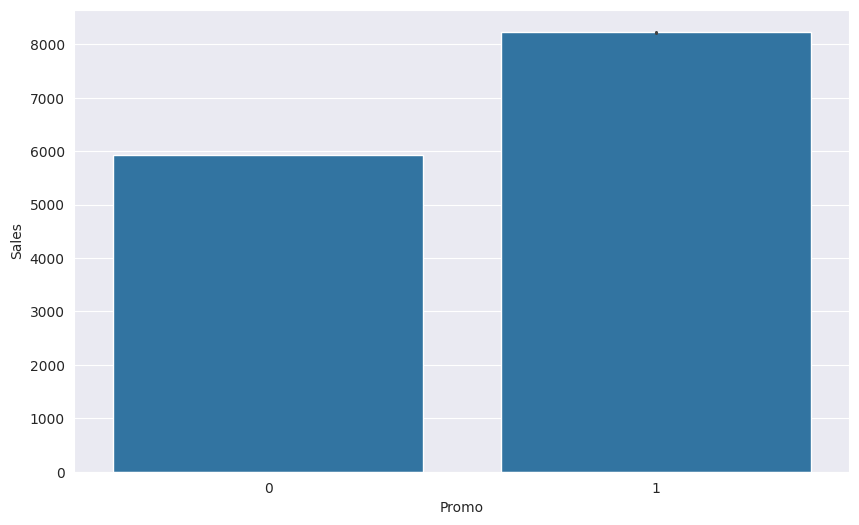

In [ ]:
sns.barplot(data=merged_df,x='Promo',y='Sales')

In [ ]:
numeric_cols=merged_df.select_dtypes(include=np.number).columns
merged_df[numeric_cols].corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,0.000346,0.007710,0.033977,NaN,-0.000012,0.000512,-0.027049,-0.051089,-0.005028,0.007736,0.010681,0.037971
DayOfWeek,0.000346,1.000000,-0.178736,-0.097266,NaN,-0.289265,-0.139315,0.005535,0.000379,0.001273,-0.003241,-0.000599,0.003387
Sales,0.007710,-0.178736,1.000000,0.823597,NaN,0.368145,0.038617,-0.036396,-0.043489,0.016101,-0.127596,0.095311,-0.034713
Customers,0.033977,-0.097266,0.823597,1.000000,NaN,0.182846,0.024902,-0.148506,-0.044965,0.010175,-0.202232,0.061682,0.040893
Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,-0.000012,-0.289265,0.368145,0.182846,NaN,1.000000,0.028964,-0.002393,-0.000131,-0.000173,-0.000324,-0.001209,-0.002183
SchoolHoliday,0.000512,-0.139315,0.038617,0.024902,NaN,0.028964,1.000000,-0.004280,-0.000445,0.000575,-0.008245,-0.003943,-0.003448
CompetitionDistance,-0.027049,0.005535,-0.036396,-0.148506,NaN,-0.002393,-0.004280,1.000000,-0.059938,0.027965,-0.141975,-0.053462,-0.111032
CompetitionOpenSinceMonth,-0.051089,0.000379,-0.043489,-0.044965,NaN,-0.000131,-0.000445,-0.059938,1.000000,-0.060725,-0.010578,-0.036149,0.049500
CompetitionOpenSinceYear,-0.005028,0.001273,0.016101,0.010175,NaN,-0.000173,0.000575,0.027965,-0.060725,1.000000,-0.077221,-0.080114,0.012592


In [ ]:
merged_df[numeric_cols].corr()['Sales'].sort_values(ascending=False)

,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
Promo2SinceWeek,0.095311
SchoolHoliday,0.038617
CompetitionOpenSinceYear,0.016101
Store,0.007710
Promo2SinceYear,-0.034713
CompetitionDistance,-0.036396
CompetitionOpenSinceMonth,-0.043489


Store not imp here!

Feature Engineering:It is the process of creating new features by transforming/combining existing features or by incorporating data from external sources.

features from Date:
1.Day of Week

2.Day of month

3.Month

4.Year

5.Weekend/Weekend

6.Month/Quarter End

In [ ]:
merged_df['Day']=merged_df.Date.dt.day
merged_df['Month']=merged_df.Date.dt.month
merged_df['Year']=merged_df.Date.dt.year

In [ ]:
merged_test_df['Day']=merged_test_df.Date.dt.day
merged_test_df['Month']=merged_test_df.Date.dt.month
merged_test_df['Year']=merged_test_df.Date.dt.year

In [ ]:
# merged_df,merged_test_df

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,150.0,9.0,2006.0,0,NaN,NaN,NaN,1,1,2013
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,860.0,10.0,1999.0,0,NaN,NaN,NaN,1,1,2013
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",1,1,2013
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,1430.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013


In [ ]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,17,9,2015
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",17,9,2015
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,17,9,2015
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,17,9,2015
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,17,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,8,2015
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,1,8,2015
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,8,2015
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,1,8,2015


<Axes: xlabel='Year', ylabel='Sales'>

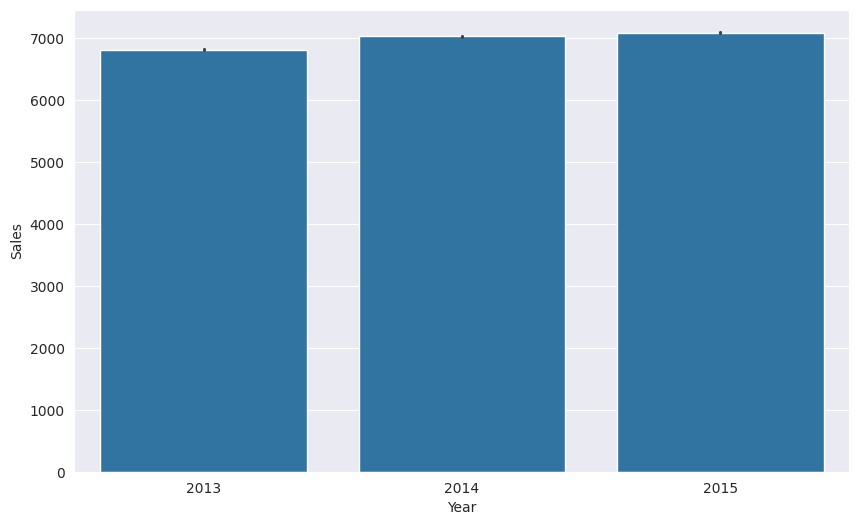

In [ ]:
sns.barplot(data=merged_df,x='Year',y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

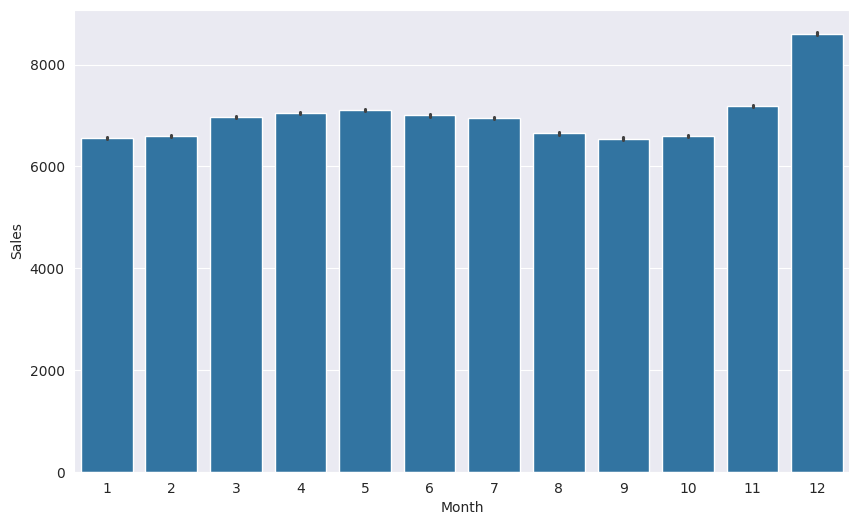

In [ ]:
sns.barplot(data=merged_df,x='Month',y='Sales')

can check weather(rained or not),StateHoliday,location also,promotion list,yes or no

In [ ]:
def get_store_sales_statistics(df, df2):
  mean=df.groupby('Store')['Sales'].mean()
  std=df.groupby('Store')['Sales'].std()
  mean_dataframe=pd.DataFrame(mean).reset_index().rename(columns={"Sales":"Sales_Mean"})
  std_dataframe = pd.DataFrame(std).reset_index().rename(columns={"Sales": "Sales_Std"})
  print(mean_dataframe)
  print(std_dataframe)
  # df2 = pd.merge(df2,mean_dataframe,on='Store',how='right').rename(columns={"Sales":"Sales_Mean"})
  df2=df.copy()
  df2 = pd.merge(df2,mean_dataframe,on='Store',how='left')
  df2 = pd.merge(df2,std_dataframe, on='Store', how='left')
  return df2
    # return df
    # .rename(columns={"Sales": "SalesStd"}) changes the column name to SalesStd to clearly label the newly merged column as the standard deviation of sales for each store.

When you merge DataFrames using pd.merge(), it is important that the columns you're merging on exist as columns in both DataFrames.
If Store is the index of mean and std, then it won’t be available as a regular column for merging. Merging requires that the column exists explicitly in the DataFrame.
Reseting the index:

By calling .reset_index() on the mean and std DataFrames, you convert Store back into a regular column rather than an index.


mean = df.groupby('Store')['Sales'].mean():

This groups the df DataFrame by the Store column and calculates the mean of the Sales column for each store.
std = df.groupby('Store')['Sales'].std():

Similarly, this calculates the standard deviation of the Sales column for each store.
mean_dataframe = pd.DataFrame(mean).reset_index():

Converts the mean Series (which has Store as the index) into a DataFrame and resets the index, so Store is a normal column.
std_dataframe = pd.DataFrame(std).reset_index():

Converts the std Series into a DataFrame and resets the index, similar to how mean was handled.
Merging statistics into df2:

The first merge joins the mean_dataframe with df2 on the Store column using a left join (how='left'), and renames the Sales column to SalesMean.
The second merge does the same for the std_dataframe, joining it on the Store column and renaming the Sales column to SalesStd.
return df2:

The function returns the df2 DataFrame with the newly added SalesMean and SalesStd columns for each store.

In [ ]:
df2 = get_store_sales_statistics(ross_df,ross_df )

      Store    Sales_Mean
0         1   3945.704883
1         2   4122.991507
2         3   5741.253715
3         4   8021.769639
4         5   3867.110403
...     ...           ...
1110   1111   4342.968153
1111   1112   8465.280255
1112   1113   5516.180467
1113   1114  17200.196391
1114   1115   5225.296178

[1115 rows x 2 columns]
      Store    Sales_Std
0         1  2015.417840
1         2  2363.628674
2         3  3298.782559
3         4  4012.592818
4         5  2389.609890
...     ...          ...
1110   1111  2500.008924
1111   1112  4919.925382
1112   1113  2811.389470
1113   1114  8343.045630
1114   1115  2847.822847

[1115 rows x 2 columns]


In [ ]:
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Mean,Sales_Std
0,1,5,2015-07-31,5263,555,1,1,0,1,3945.704883,2015.417840
1,2,5,2015-07-31,6064,625,1,1,0,1,4122.991507,2363.628674
2,3,5,2015-07-31,8314,821,1,1,0,1,5741.253715,3298.782559
3,4,5,2015-07-31,13995,1498,1,1,0,1,8021.769639,4012.592818
4,5,5,2015-07-31,4822,559,1,1,0,1,3867.110403,2389.609890
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,4342.968153,2500.008924
1017205,1112,2,2013-01-01,0,0,0,0,a,1,8465.280255,4919.925382
1017206,1113,2,2013-01-01,0,0,0,0,a,1,5516.180467,2811.389470
1017207,1114,2,2013-01-01,0,0,0,0,a,1,17200.196391,8343.045630


In [ ]:
# We dont have area but we can approximate the area based on sales....
# log Transformations
ross_df['Sales']=np.log(ross_df.Sales)
ross_df

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,8.568456,555,1,1,0,1
1,2,5,2015-07-31,8.710125,625,1,1,0,1
2,3,5,2015-07-31,9.025696,821,1,1,0,1
3,4,5,2015-07-31,9.546455,1498,1,1,0,1
4,5,5,2015-07-31,8.480944,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,-inf,0,0,0,a,1
1017205,1112,2,2013-01-01,-inf,0,0,0,a,1
1017206,1113,2,2013-01-01,-inf,0,0,0,a,1
1017207,1114,2,2013-01-01,-inf,0,0,0,a,1


In [ ]:
len(merged_df)

844392

In [ ]:
train_size=int(.75*len(merged_df))
train_size

633294

In [ ]:
sorted_df=merged_df.sort_values('Date')
train_df,val_df=sorted_df[:train_size],sorted_df[train_size:]

In [ ]:
train_df.shape

(633294, 21)

In [ ]:
len(val_df)

211098

In [ ]:
train_df.Date.min(),train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [ ]:
val_df.Date.min(),val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
merged_test_df.Date.max(),merged_test_df.Date.min()

(Timestamp('2015-09-17 00:00:00'), Timestamp('2015-08-01 00:00:00'))

In [ ]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
# Sales and Customers does not come in input_cols as Sales is target_col,Customers is not in test_df,why to train on that then
input_cols=['Store','DayOfWeek','Promo','StateHoliday','StoreType','Assortment','Day','Month','Year']

In [ ]:
target_col='Sales'

In [ ]:
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


In [ ]:
# Store should be treated as categorical columns:encoding severly increase size of dataset and bit harder to train(CURSE OF DIMENSIONALITY)
# Basically, the curse of dimensionality refers to the problems that arise when you work with high-dimensional data.
# As the number of features (or dimensions) in your dataset increases,the volume of the space increases exponentially, which can make the data sparse and harder to work with.
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()
test_inputs=merged_test_df[input_cols].copy()
# test_targets=merged_test_df[target_col].copy()
# Test data does not have target

KeyError: 'Sales'

In [ ]:
val_targets

,Sales
256637,3720
256638,4258
256639,7170
256640,7359
256635,4579
...,...
744,8363
745,9082
746,10708
740,11253


In [ ]:
train_inputs['Promo']

,Promo
1017190,0
1016179,0
1016353,0
1016356,0
1016368,0
...,...
256632,0
256642,0
256634,0
256633,0


In [ ]:
train_targets

,Sales
1017190,5961
1016179,4220
1016353,6851
1016356,17267
1016368,3102
...,...
256632,6897
256642,15736
256634,7444
256633,5207


In [ ]:
numeric_cols

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [ ]:
numeric_cols=['Store','Day','Month','Year']
categorical_cols=['DayOfWeek','Promo','StateHoliday','StoreType','Assortment']

In [ ]:
train_inputs[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,2


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer=SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])
# for null values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler().fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])
# mean=0 and stddev=1
# (0,1)or(-1,1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [ ]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

In [ ]:
val_targets=val_df[target_col].copy()
val_targets

,Sales
256637,3720
256638,4258
256639,7170
256640,7359
256635,4579
...,...
744,8363
745,9082
746,10708
740,11253


In [ ]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0,0,a,a,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,3,0,0,a,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,3,0,0,c,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,3,0,0,d,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
x_train=train_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]
x_test=test_inputs[numeric_cols+encoded_cols]

In [ ]:
x_val

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
256637,0.673250,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256638,0.674147,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256639,0.675045,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
256640,0.675943,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256635,0.670557,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0.667864,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
745,0.668761,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
746,0.669659,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
740,0.664273,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
x_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# %pip install jovian --quiet
# import jovian
# jovian.commit()

In [ ]:
# Baseline models
# Approximations
train_targets.mean()

6873.17964168301

In [ ]:
def return_mean(inputs):
  return np.full(len(inputs),merged_df.Sales.mean())

In [ ]:
train_preds=return_mean(x_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [ ]:
# check the evaluation metrics
from sklearn.metrics import mean_squared_error

In [ ]:
# %pip install  scikit-learn --upgrade
# mean_squared_error(train_preds,train_targets,squared=False)
error=mean_squared_error(train_preds,train_targets)
rmse=np.sqrt(error)
rmse
# more than 20% loss:counterpredictions where preds are bad

3082.450443277419

In [ ]:
# Any ml model should have lower loss than just predicting the average
# Rmse should be lesss than 3000
mean_squared_error(return_mean(x_val),val_targets)
rmse_val=np.sqrt(mean_squared_error(return_mean(x_val),val_targets))
rmse_val

3168.6033635047716

In [ ]:
def guess_random(inputs):
  lo,hi=merged_df.Sales.min(),merged_df.Sales.max()
  lo,hi=3000,18000
  return np.random.random(len(inputs))*(hi-lo)+lo

The code generates random values between lo and hi for each element in inputs, regardless of the actual values in inputs. It’s based purely on the length of inputs.

In [ ]:
train_preds=guess_random(x_train)
train_preds

array([14696.1778021 , 10546.11972554,  9775.56573643, ...,
       13948.34622334,  3882.07462793, 15545.44285139])

In [ ]:
mean_squared_error(train_preds,train_targets)
rmse=np.sqrt(mean_squared_error(train_preds,train_targets))
rmse

6440.560669979118

In [ ]:
# mean_squared_error(guess_random(x_val),val_targets)
# rmse1=np.sqrt(guess_random(x_val),val_targets)
# rmse1

In [ ]:
x_val

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
256637,0.673250,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256638,0.674147,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256639,0.675045,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
256640,0.675943,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256635,0.670557,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0.667864,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
745,0.668761,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
746,0.669659,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
740,0.664273,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
val_targets

,Sales
256637,3720
256638,4258
256639,7170
256640,7359
256635,4579
...,...
744,8363
745,9082
746,10708
740,11253


In [ ]:
# HAND CODED STRATEGY:
# If the store is closed,return 0
# if its open,return the average sales of store in current month in prev year

# def store_check(train_df):
#   date=pd.to_datetime(train_df['Date'])
#   month=date.dt.month
#   year=date.dt.year
#   if (train_df['Open']==0).any():
#      print("closed")
#      return
#   else:
#     # if (year>2013)and (year<2015):
#     if(year==2014).any():
#       mean1=train_df.groupby([month,year-1])['Sales'].mean()
#       return mean1
#     else:
#       mean2=train_df.groupby([month,year])['Sales'].mean()
#       return mean2
# df=store_check(train_df)
# # df.shape
# df

# ERROR?

If you're trying to check whether the store is closed in your dataframe (train_df) and print "closed" when Open == 0, your current approach won't work as expected because train_df['Open'] returns a Series (a column of the DataFrame), not a single value

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg=LinearRegression()

In [ ]:
linreg.fit(x_train,train_targets)

LinearRegression()

In [ ]:
# LinearRegression uses ordinary least squares to optimize and r squared loss function.
# good weight identified

In [ ]:
linreg.coef_

array([ 1.04613988e+02, -1.00014797e+02,  6.50678489e+02,  1.04413753e+02,
        9.88487856e+02, -1.25115344e+02, -3.95828726e+02, -3.97660124e+02,
       -7.18979775e+00, -6.37157355e+01,  1.02187074e+00, -1.13867445e+03,
        1.13867445e+03, -1.23115139e+02, -5.62555847e+01, -3.90512282e+01,
        2.18421952e+02, -1.23677263e+03,  4.17553271e+03, -1.34703585e+03,
       -1.59172423e+03,  9.42626963e+02, -2.61870726e+03,  1.67608030e+03])

In [ ]:
len(x_train.columns)

24

In [ ]:
x_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [ ]:
train_preds=linreg.predict(x_train)
train_preds

array([ 7115.08762455, 10581.38651873,  7036.39236244, ...,
        6241.95353708,  5997.17125059,  5618.95124099])

In [ ]:
mse=mean_squared_error(train_preds,train_targets)
rmse=np.sqrt(mse)
rmse

2741.587191916578

In [ ]:
x_val.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [ ]:
val_targets

,Sales
256637,3720
256638,4258
256639,7170
256640,7359
256635,4579
...,...
744,8363
745,9082
746,10708
740,11253


In [ ]:
x_val=val_inputs[numeric_cols+encoded_cols]

In [ ]:
val_targets=val_df[target_col].copy()
linreg=LinearRegression()
linreg.fit(x_val,val_targets)
val_preds=linreg.predict(x_val)
print(val_preds)
mse1=np.sqrt(mean_squared_error(val_preds,val_targets))
# rmse1=np.sqrt(mse1)
# rmse1
mse1
# val_preds
# x_val
# mse1
# val_preds
#  same as almost guessing the mean
# ERROR?

[6895.25312663 6895.27458876 7755.23068534 ... 8942.17266952 8812.90350502
 7909.10839319]


2767.253152413992

In [ ]:
val_targets

,Sales
256637,3720
256638,4258
256639,7170
256640,7359
256635,4579
...,...
744,8363
745,9082
746,10708
740,11253


In [ ]:
x_val

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
256637,0.673250,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256638,0.674147,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256639,0.675045,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
256640,0.675943,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256635,0.670557,0.3,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0.667864,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
745,0.668761,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
746,0.669659,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
740,0.664273,1.0,0.545455,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
len(val_targets)

211098

1.Identify what all models can work

2.Train a basic model and see result

3.Identify the modelling approach that work and tune the hyperparameters

4.Use spreadsheet to keep track of data.

In [ ]:
def try_model(model):
  # Fit the model
  model.fit(x_train,train_targets)
  # predict
  train_preds=model.predict(x_train)
  val_preds=model.predict(x_val)
  # lossss
  train_rmse=np.sqrt(mean_squared_error(train_preds,train_targets))
  val_rmse=np.sqrt(mean_squared_error(val_preds,val_targets))
  # print(val_preds)
  return train_rmse,val_rmse

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor

In [ ]:
# model=LinearRegression()
try_model(LinearRegression())

(2741.587191916578, 2817.7797940117125)

In Ridge regression, the penalty is based on the square of the coefficients, while in Lasso regression, the penalty is based on the absolute values of the coefficients.


IS IT MUCH GOOD TO MAKE THE MODEL COEF TERM SUM ZERO?

1. Why Do Coefficients Sum to Zero?
In Lasso (L1 regularization), some coefficients may be shrunk to zero, but the model doesn't enforce a strict condition that the sum of the coefficients should be zero. Instead, the L1 regularization encourages sparsity in the coefficients, which means some coefficients become exactly zero, while others get smaller but not necessarily to zero.

However, making the sum of all coefficients exactly zero is not a common practice, except in specific scenarios, and it might not be particularly useful for most machine learning tasks. Here's why:

2. Coefficients and Feature Selection in Lasso/Ridge
Lasso:

The goal of Lasso regularization (L1) is to minimize overfitting by penalizing the absolute size of the coefficients. This results in some coefficients being pushed to exactly zero.
The sparsity induced by Lasso is useful for feature selection, where less important features can be completely removed (their coefficients set to zero).
Lasso doesn’t require the sum of the coefficients to be zero—it just shrinks irrelevant coefficients to zero to improve model performance and interpretability.
Ridge:

In Ridge regularization (L2), the penalty term penalizes the sum of the squared coefficients. This does not generally force any coefficients to zero. Instead, all coefficients are shrunk toward zero.
Ridge is particularly useful for cases where you want to keep all features in the model but prevent overfitting by reducing the magnitude of the coefficients. The coefficients won't sum to zero unless the data itself naturally supports it.
3. Why Force the Coefficients Sum to Zero?
In some specific use cases, you may want the sum of the coefficients to be zero. This could happen if:

The coefficients represent a set of effects that should balance each other out in some way. For example, in some economic or financial models, you might want a constraint that the overall effect is balanced.
Constraining the coefficients to sum to zero might be part of a regularization technique designed to encourage balance across features. However, this is relatively uncommon and not a typical goal in most standard machine learning applications.
Forcing the sum of the coefficients to be zero can be seen as a constraint in some optimization problems. But in most ML models, the goal is to minimize the loss (like Mean Squared Error or Log-Loss) while simultaneously controlling for overfitting using regularization techniques, not necessarily making the sum of coefficients zero.



In [ ]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [ ]:
try_model(Lasso())

(2741.7143904640566, 2817.9472924045217)

In [ ]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [ ]:
try_model(ElasticNet(alpha=.6))

(2843.6585896792467, 2935.862100049394)

In [ ]:
try_model(SGDRegressor())

(2742.0011879162344, 2814.321713068984)

ElasticNet is a regularization technique that combines both L1 (Lasso) and L2 (Ridge) regularization methods. It is particularly useful when you have many features and want to benefit from both feature selection (Lasso) and coefficient shrinkage (Ridge).
ElasticNet=RSS+lambda*(alpha*sumofcoef+((1-alpha)/2)*sq(sumofcoef))

In [ ]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [ ]:
tree=DecisionTreeRegressor(random_state=42)

In [ ]:
try_model(tree)

(0.0, 1559.7378600480247)

[Text(0.5, 0.9, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.3, 'StoreType_b <= 0.5\nsquared_error = 7967330.328\nsamples = 210684\nvalue = 7631.861'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Day <= 0.35\nsquared_error = 13800173.481\nsamples = 12660\nvalue = 9843.895'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.3, 'Day <= 0.95\nsquared_error = 11907411.6\nsamples = 54232\nvalue = 9578.715'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Day <= 0.2

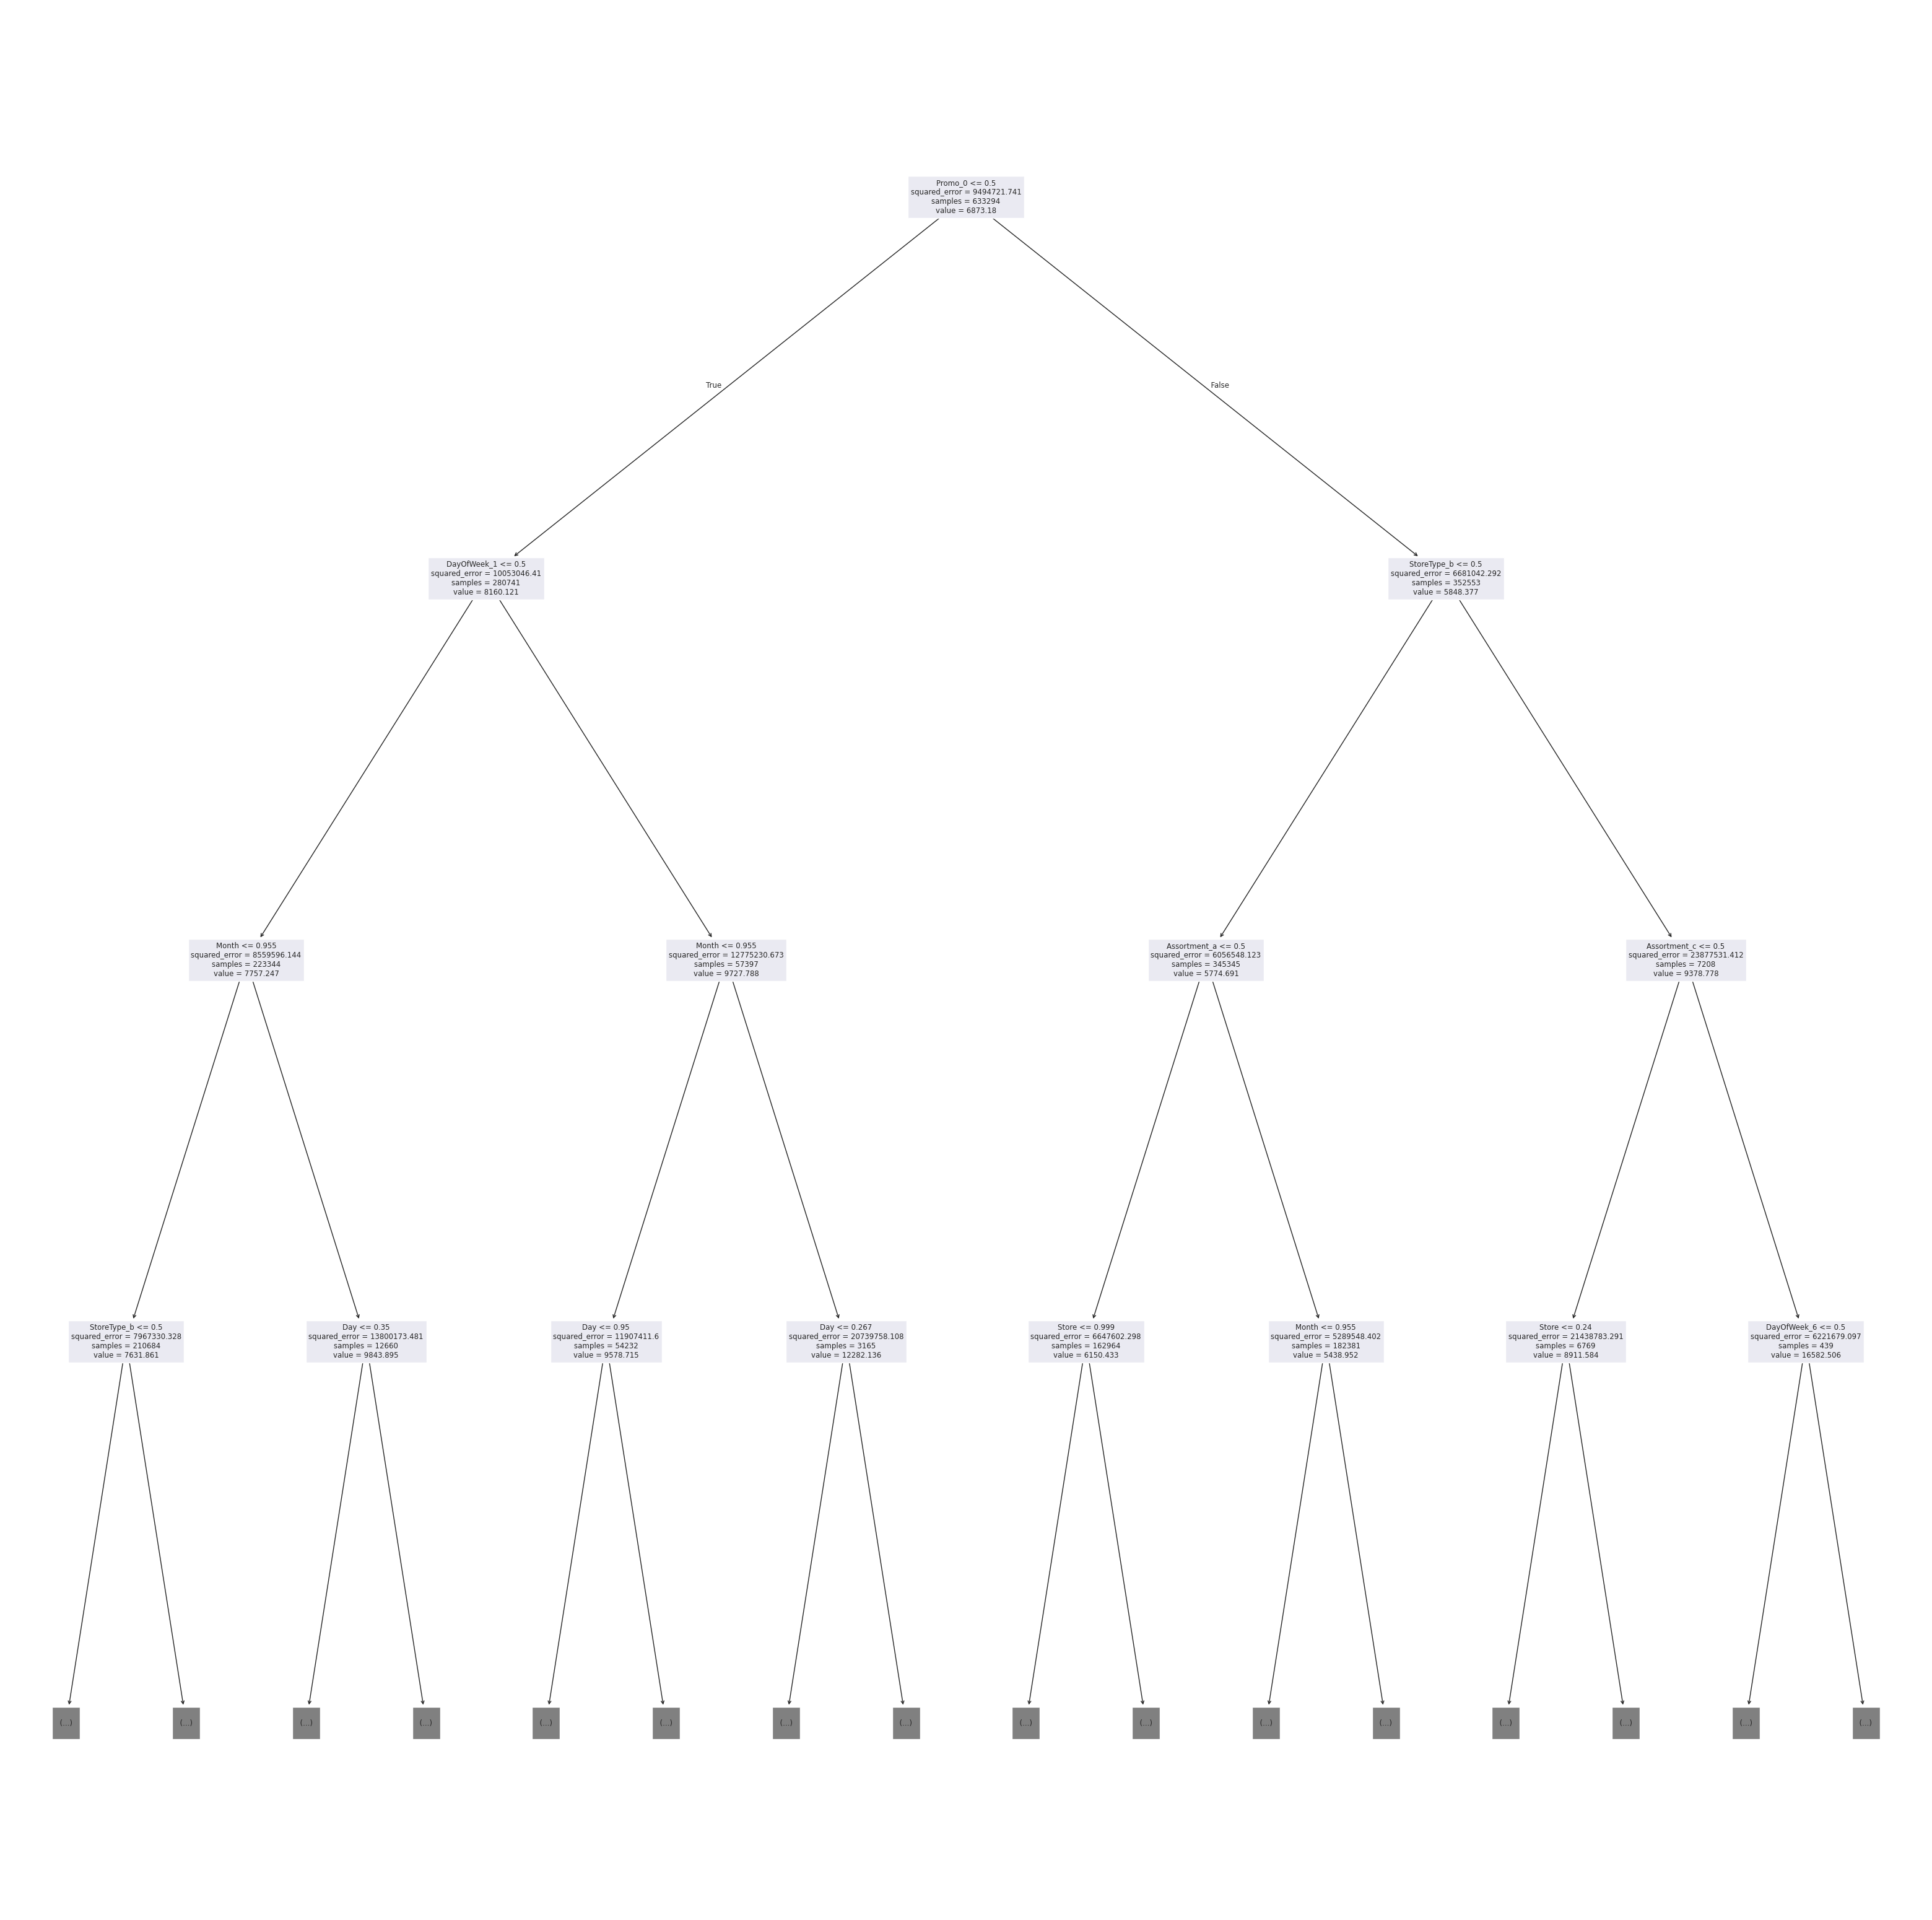

In [ ]:
plt.figure(figsize=(40,40))
plot_tree(tree,max_depth=3,feature_names=numeric_cols+encoded_cols)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
# rf=RandomForestRegressor(n_jobs=-1,random_state=42)
# try_model(rf)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [ ]:
# rf=RandomForestRegressor(n_jobs=-1,random_state=42,n_estimators=20)
# try_model(rf)

Business requires how u arraive at certain result,willing for interpretability:sacrifice for accuracy,go for Decision Tree..
Can just try out RandomForest for accuracy(hyperparameter tuning canbe done

Grid Search is a powerful technique used for hyperparameter tuning in machine learning. The purpose of Grid Search is to find the best combination of hyperparameters for a given model by exhaustively searching through a specified parameter grid. It’s a brute-force approach that systematically evaluates all possible combinations of the provided hyperparameters and selects the one that gives the best performance based on a defined evaluation metric (usually cross-validation accuracy or error rate).

Define the Model: Choose the machine learning model you want to tune. For example, a decision tree, support vector machine (SVM), or logistic regression.

Choose Hyperparameters to Tune: Hyperparameters are parameters that are set before training the model (e.g., the regularization strength for Ridge, the number of trees in a Random Forest).
 Grid search requires you to specify which hyperparameters you want to tune and their possible values.


Create a Parameter Grid: Create a grid of possible values for each hyperparameter. Grid search will try all combinations of these values.


Evaluate Model Performance: Grid search uses cross-validation (or a simple train-test split) to evaluate the performance of the model for each hyperparameter combination.


Select the Best Combination: The combination of hyperparameters that results in the best performance (according to a predefined metric) is selected.


K Fold Cross Validation:


Split the Data: The dataset is divided into K equal-sized folds (subsets). Typically, K is set to 5 or 10, but it can vary depending on the size of the dataset.


Model Training and Validation:
For each fold, the model is trained on K-1 folds (training data) and tested on the remaining 1 fold (validation data).
This process is repeated K times, each time with a different fold serving as the validation set, and the remaining folds are used for training.


Average the Results: After completing all K iterations, the performance metrics (such as accuracy, precision, recall, etc.) from each fold are averaged to provide a more reliable estimate of the model's performance.


Final Model: Once cross-validation is complete, the model is typically retrained on the entire dataset using the best hyperparameters found during cross-validation.

Ensembling and Stacking:

It refers to combining the results of multiple models.

In [ ]:
# How to ensemble the result of random foresta and ridge regressor?
rf=RandomForestRegressor(n_jobs=-1,random_state=42)
ridge=Ridge(alpha=0.1)
rf_preds=rf.fit(x_train,train_targets).predict(x_val)
ridge_preds=ridge.fit(x_train,train_targets).predict(x_val)
ensemble_preds=(rf_preds+ridge_preds)/2
rmse=np.sqrt(mean_squared_error(val_targets,ensemble_preds))
rmse

1799.6834540300804

STRAGIES TO IMPROVE MODEL PERFORMANCE:

1.Gather more data

2.Include more features

3.Tune the hyperparameters

4.Look at examples where model make incorrect or bad predictions and gather some insights

5.Try stragies like grid search,k fold cross validation

6.Emsembling and stacking


In [ ]:
# INTERPRETATION AND PRESENTATION
# model.coef_ for linear models and feature.importance_ for decision trees
x_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [ ]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [ ]:
importance_df=pd.DataFrame({
    'feature':x_train.columns,
    'importance':rf.feature_importances_
}).sort_values('importance',ascending=False)
importance_df

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


<Axes: xlabel='importance', ylabel='feature'>

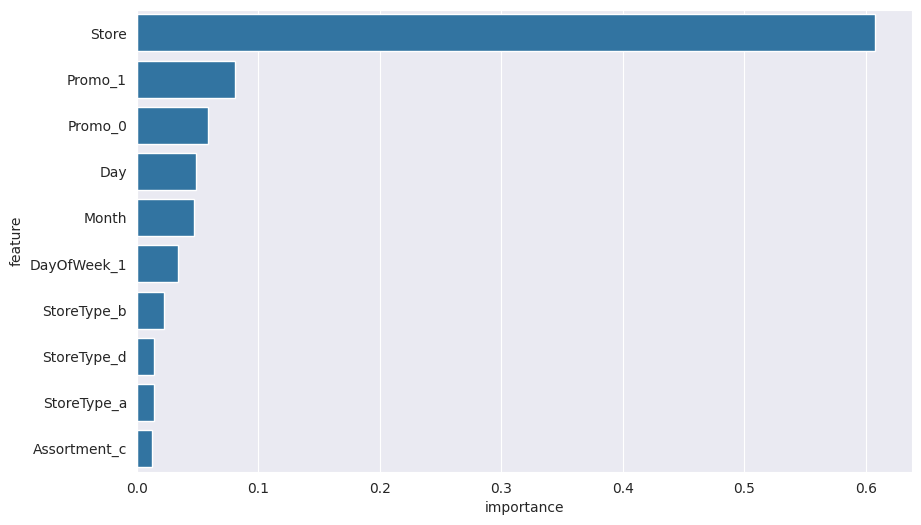

In [ ]:
sns.barplot(importance_df.head(10),x='importance',y='feature')

The above chart can be shown to non technical stakeholders to explaon how the model arrives at result.For greater explainability,a single decision tree is used.

In [153]:
# maybe area,location,no of people working(footfall) in a store is an important thing......
def predict_input(model,single_input):
  if single_input['Open']==0:
    return 0
  input_df=pd.DataFrame([single_input])
  input_df['Date']=pd.to_datetime(input_df['Date'])
  input_df['Day']=input_df.Date.dt.day
  input_df['Month']=input_df.Date.dt.month
  input_df['Year']=input_df.Date.dt.year
  input_df[numeric_cols]=imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols]=scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols]=encoder.transform(input_df[categorical_cols])
  x_input=input_df[numeric_cols+encoded_cols]
  preds=model.predict(x_input)[0]
  return preds

In [160]:
sample_input={'Id':1,
    'Store':1,
    'DayOfWeek':4,
    'Date':'2015-09-17 00:00:00',
    'Promo':1,
    'StateHoliday':'0',
    'SchoolHoliday':0,
    'StoreType':'c',
    'Assortment':'a',
    'Open':1.0,
    'Promo2':0.0,
    'Promo2SinceWeek':np.nan,
    'Promo2SinceYear':np.nan,
    'PromoInterval':np.nan
}

In [161]:
predict_input(rf,sample_input)

4258.01

Presenting your results:
Create a problem for non technical stakeholders

understand your audience-figure out what they care about most

Avoid the showing any code or technical jargon,include visualisations

Focus on metrics relevant for business

Talk about feature importance and interpret results

explain strength and limitations of the model

explain how model can be improve over time

In [162]:
x_test

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.001795,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.005386,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.006284,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.007181,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.996409,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41084,0.997307,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41085,0.998205,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
41086,0.999102,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [166]:
rf=RandomForestRegressor(n_jobs=-1,random_state=42,n_estimators=20).fit(x_train,train_targets)
test_preds=rf.predict(x_test)
test_preds

array([ 4107.65,  7750.75,  8794.25, ...,  6032.95, 20738.55,  6717.4 ])

In [167]:
submission_df=pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [168]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [170]:
submission_df['Sales']=test_preds

In [171]:
submission_df['Sales']

,Sales
0,4107.65
1,7750.75
2,8794.25
3,6874.60
4,6628.50
...,...
41083,3185.00
41084,8505.95
41085,6032.95
41086,20738.55


In [172]:
submission_df.fillna(0,inplace=True)

In [174]:
submission_df.to_csv('submission.csv',index=False)
# This argument ensures that the DataFrame's index is not written into the CSV file.
# If you set index=True, the index will be included in the file.

In [175]:
test_df['Open'].value_counts()

,count
Open,
1.0,35093
0.0,5984


In [177]:
submission_df['Sales']=test_df['Open'].fillna(1).astype('int')*test_preds

Step 1: Fill NaN in the Open column with 1:

The fillna(1) will replace any missing values (NaN) in the Open column with 1.

Step 2: Convert the Open column to integers:

The .astype('int') converts the Open column to integer type, ensuring that the column has values like 1 or 0 (1 for open, 0 for closed).

Step 3: Multiply with test_preds:

This will multiply each element in the Open column by the corresponding element in the test_preds array. This operation will not update the Open column directly. Instead, it will produce a new series (i.e., the result of the multiplication), which can be stored as a new column if you wish.

In [178]:
submission_df['Sales']

,Sales
0,4107.65
1,7750.75
2,8794.25
3,6874.60
4,6628.50
...,...
41083,3185.00
41084,8505.95
41085,6032.95
41086,20738.55


In [182]:
submission_df.to_csv('submission.csv',index=False)

In [183]:
!head submission.csv

Id,Sales
1,4107.65
2,7750.75
3,8794.25
4,6874.6
5,6628.5
6,5699.85
7,8110.75
8,8292.45
9,5928.2


In [184]:
from IPython.display import FileLink

IPython in Jupyter Notebooks:
In a Jupyter notebook, IPython is used as the default kernel for running Python code. In this environment, you can use IPython’s rich functionality, such as:

Inline plotting with matplotlib.
Displaying rich media (images, videos, HTML, LaTeX) with IPython.display.
Magic commands to run system commands, time code, and handle large datasets.


In [186]:
FileLink('submission.csv')

/content/submission.csv

Model Deployment:

At this point,the model can be handled over to the software devlepor/ML engineer who can put model into productions part of existing software system.Its imp to monitor the results and make improvements from time to time using Flask.